In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/rellimylime/eds220-hwk2

- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

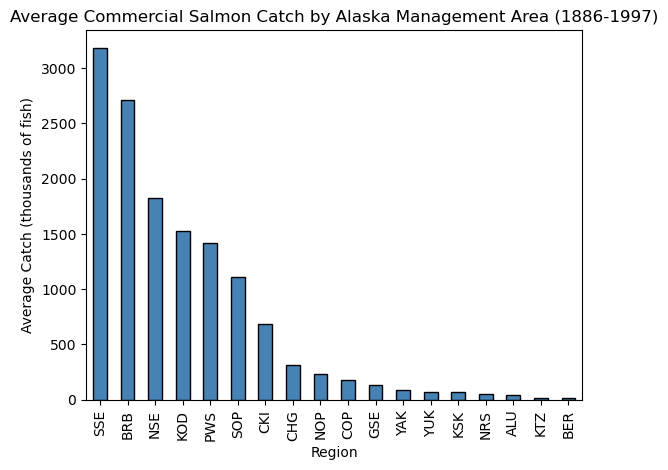

In [29]:
# FINAL CODE: Alaska Salmon Catch Analysis

# Import necessary packages
import pandas as pd

# Load salmon_data.csv
catch_data = pd.read_csv("data/salmon_data.csv")

# Data Exploration - uncomment the following code to view exploration results
# # ------------------------------------------------------------
# # Print first and last 5 rows of the dataframe
# print("Catch data head\n-------------------------\n", catch_data.head())
# print("Catch data tail\n-------------------------\n", catch_data.tail())

# # Print count of non na and datatypes for each column
# print("Catch data info\n-------------------------")
# catch_data.info()

# # Print number of unique values in each column
# print("Catch data number of unique values\n-------------------------\n", catch_data.nunique())

# # Print the unique values of the notesRegCode column
# print(pd.DataFrame(catch_data['notesRegCode'].unique()))

# # Print the data type of each column
# print("Catch data datatypes:", catch_data.dtypes)

# # ------------------------------------------------------------

# Drop the `notesRegCode` column
catch_data = catch_data.drop('notesRegCode', axis = 1)

# Convert non-numeric value catch to 1
catch_data.loc[~catch_data['Catch'].str.isnumeric(), 'Catch'] = 1

# Convert Catch column to integer
catch_data['Catch'] = catch_data['Catch'].astype('int64')

# Group by `Region` and then find the mean Catch over each group
avg_region = catch_data.groupby("Region")["Catch"].mean()

# Calculate average catch by region, sort in descending order, and plot data as a bar graph
ax = catch_data.groupby('Region')['Catch'].mean().sort_values(ascending = False).plot(kind = 'bar',
                                                                                     color = 'steelblue',
                                                                                     edgecolor = 'black')               

# Add axis labels and title
ax.set_title('Average Commercial Salmon Catch by Alaska Management Area (1886-1997)');
ax.set_ylabel('Average Catch (thousands of fish)');
ax.set_xlabel('Region');

## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [ ]:
# a.
# Import necessary packages
import pandas as pd

# Import salmon_data.csv
catch_data = pd.read_csv("data/salmon_data.csv")


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [2]:
# b.
# Print first and last 5 rows of the dataframe
display("Catch data head\n-------------------------\n", catch_data.head())
print("Catch data tail\n-------------------------\n", catch_data.tail())

# Print count of non na and datatypes for each column
print("Catch data info\n-------------------------")
catch_data.info()

# Print number of unique values in each column
print("Catch data number of unique values\n-------------------------\n", catch_data.nunique())

'Catch data head'

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


'Catch data tail'

,Region,Year,notesRegCode,Species,Catch
8535,NOP,1993,NaN,Chum,135
8536,NOP,1994,NaN,Chum,84
8537,NOP,1995,NaN,Chum,99
8538,NOP,1996,NaN,Chum,68
8539,NOP,1997,NaN,Chum,97


'Catch data info'

<bound method DataFrame.info of      Region  Year notesRegCode  Species Catch
0       SSE  1886          NaN  Chinook     0
1       SSE  1887          NaN  Chinook     0
2       SSE  1888          NaN  Chinook     0
3       SSE  1889          NaN  Chinook     0
4       SSE  1890          NaN  Chinook     0
...     ...   ...          ...      ...   ...
8535    NOP  1993          NaN     Chum   135
8536    NOP  1994          NaN     Chum    84
8537    NOP  1995          NaN     Chum    99
8538    NOP  1996          NaN     Chum    68
8539    NOP  1997          NaN     Chum    97

[8540 rows x 5 columns]>

'Catch data number of unique values'

Region            18
Year             120
notesRegCode      29
Species            5
Catch           1879
dtype: int64

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

I first printed the head of the data to get an idea of what the data looks like. I learned that there are 5 columns, 8540 rows, and that `Year` and `Catch` seem to be numerical values while the rest are strings. I then wanted to check this, as well as investigate the `notesRegCode` column which, from `head` and `tail`, seemed to be entirely `NAN` values, by using the `.info()` function. I learned that the `Catch` column is actually stored as an object type, not integer as I had initially thought. I also found that the only column with null values is the `notesRegCode` column. Finally I wanted to see how many different species, years, regions, etc. we would be dealing with so I used the `.nunique()` function to return the number of unique values in each column. From this I learned that our data is from 120 different years, covers 5 different species, and is collected from 18 different regions.

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [5]:
# Store the unique values of the notesRegCode column
notes_unique = catch_data['notesRegCode'].unique()

# Print the results
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

In [6]:
grader.check("q2a")

q2a results: All test cases passed!

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [7]:
# Drop the `notesRegCode` column
catch_data = catch_data.drop('notesRegCode', axis = 1)

In [8]:
grader.check("q2b")

q2b results: All test cases passed!

<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


In [9]:
# Print the data type of each column
print("Catch data datatypes:", catch_data.dtypes)

Catch data datatypes: Region     object
Year        int64
Species    object
Catch      object
dtype: object


As mentioned previously, it was surprising to me to see that the `Catch` column, which from the exploration appears to contained integers, is stored as an `object` rather than as `int64`.

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [10]:
#catch_data['Catch'].astype('int64')

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. It should contain the original index number in order to pass the test. 

In [11]:
# Filter the df to rows in which the value of `Catch` is not entirely numeric 
catch_I = catch_data[~catch_data['Catch'].str.isnumeric()]

# Return the filtered df
catch_I 

,Region,Year,Species,Catch
400,GSE,1955,Chinook,I


In [12]:
grader.check("q5")

q5 results: All test cases passed!

## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

<!-- BEGIN QUESTION -->



In [13]:
# Use `.loc` to update the value of the df at index 400, and column "Catch"
catch_data.loc[400, 'Catch'] = 1

# Use `.loc` to store the updated column as catch_1
catch_1 = catch_data.loc[400]

# Print catch_1
catch_1

Region         GSE
Year          1955
Species    Chinook
Catch            1
Name: 400, dtype: object

<!-- END QUESTION -->

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [14]:
# Update the `Catch` column to be type int64`
catch_data["Catch"] = catch_data['Catch'].astype('int64')

# Store and return the updated type of the `Catch` column
catch_column_type = catch_data['Catch'].dtype
catch_column_type

dtype('int64')

In [15]:
grader.check("q7")

q7 results: All test cases passed!

<!-- BEGIN QUESTION -->

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [16]:
# Group by `Region` and then find the mean Catch over each group
avg_region = catch_data.groupby("Region")["Catch"].mean()
avg_region

Region
ALU      40.383908
BER      16.372549
BRB    2709.796491
CHG     315.487273
CKI     683.571429
COP     179.223404
GSE     133.841463
KOD    1528.350000
KSK      67.642353
KTZ      18.836145
NOP     229.493478
NRS      51.502703
NSE    1825.020870
PWS    1419.236697
SOP    1110.942222
SSE    3184.660714
YAK      91.922917
YUK      68.645570
Name: Catch, dtype: float64

In [17]:
grader.check("q8")

q8 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

<Axes: xlabel='Region'>

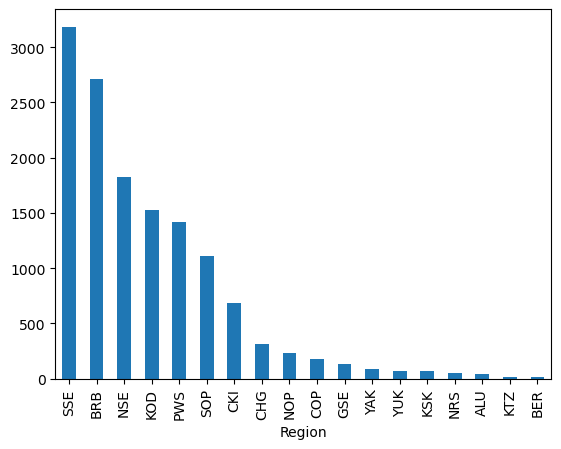

In [18]:
# Sort avg_region by values
avg_region_sorted = avg_region.sort_values(ascending = False)

# Plot the data 
avg_region_sorted.plot(kind = "bar")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

This bar chart displays the total commerical salmon catches (in thousands of fish) across Alaska, arranged by catch size. From the plot we can see;
- Southern Southeast Alaska (SSE) and Bristol Bay (BRB) are the region the largest catch volumes. Northern Sourtheast Alaska (NSE), Cook Inlet (CKI), Prince William Sound Subarea (PWS), and the South Peninsula Subarea (SOP) where the next three larest.
- The three lowest regions are Bering River Subarea (BER), Kotzebue (KTZ), and Aleutian Islands Subarea (ALU). 
Consider this map:
![Commercial_Salmon_Management_Areas.jpg](attachment:Commercial_Salmon_Management_Areas.jpg)

We can see that generally, the areas with higher catch volumes are in the southern part of the state whereas the ones with lower catch volumes seem to be more north.

In [1]:
from IPython.display import Image

Image(url="attachment:Commercial_Salmon_Management_Areas.jpg", width=300, height=300)

<!-- END QUESTION -->

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [19]:
grader.check_all()

q2a results: All test cases passed!

q2b results: All test cases passed!

q5 results: All test cases passed!

q7 results: All test cases passed!

q8 results: All test cases passed!